Inspired by : 

https://www.behance.net/gallery/100683383/Travelling-to-Outer-Space  
https://mir-s3-cdn-cf.behance.net/project_modules/2800_opt_1/a223b4100683383.6096c912857c0.png  
      


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:

df = pd.read_csv("astronauts.csv", sep=";").replace({np.nan: None}) #.fillna(value=None)

for k in ['Hours/mission', 'Total hrs (sum)', 'EVA hrs/mission', 'Total EVA hrs' ]:
    df[k] = df[k].str.replace(",", ".").astype('float64')

#df['Decade of mission'] = ((df['Year of mission']/10).apply(np.floor)*10).astype(int)
    
df.head(5)

ID  Number  Nationwide number                 Name  \
0   1       1                  1        Gagarin, Yuri   
1   2       2                  2       Titov, Gherman   
2   3       3                  1  Glenn, John H., Jr.   
3   4       3                  1  Glenn, John H., Jr.   
4   5       4                  2  Carpenter, M. Scott   

             Original name Sex  Year of birth     Nationality  \
0  ГАГАРИН Юрий Алексеевич   M           1934  U.S.S.R/Russia   
1  ТИТОВ Герман Степанович   M           1935  U.S.S.R/Russia   
2      Glenn, John H., Jr.   M           1921            U.S.   
3      Glenn, John H., Jr.   M           1921            U.S.   
4      Carpenter, M. Scott   M           1925            U.S.   

  Military/Civilian               Selection  Year of Selection  \
0               Mil                  TsPK-1               1960   
1               Mil                  TsPK-1               1960   
2               Mil  NASA Astronaut Group 1               1959   
3               Mil  NASA Astronaut Group 2               1959   
4               Mil                 NASA- 1               1959   

   mission number  total number of missions Occupation  Year of mission  \
0               1                         1      pilot             1961   
1               1                         1      pilot             1961   
2               1                         2      pilot             1962   
3               2                         2        PSP             1998   
4               1                         1      Pilot             1962   

     Mission title   Ascend shuttle         In orbit  Descend shuttle  \
0         Vostok 1         Vostok 1         Vostok 2         Vostok 3   
1         Vostok 2         Vostok 2         Vostok 2         Vostok 2   
2             MA-6             MA-6             MA-6             MA-6   
3           STS-95           STS-95           STS-95           STS-95   
4  Mercury-Atlas 7  Mercury-Atlas 7  Mercury-Atlas 7  Mercury-Atlas 7   

   Hours/mission  Total hrs (sum)  Field21  EVA hrs/mission  Total EVA hrs  
0           1.77             1.77        0              0.0            0.0  
1          25.00            25.30        0              0.0            0.0  
2           5.00           218.00        0              0.0            0.0  
3         213.00           218.00        0              0.0            0.0  
4           5.00             5.00        0              0.0            0.0

In [3]:
final_df = pd.DataFrame()

for ( (astro_nbr, astro_name, astro_nat, astro_sex), group) in df.sort_values('Year of mission', ascending=True).groupby(["Number", 'Name', 'Nationality', 'Sex']):

    base = {"id":astro_nbr,
            "name":astro_name,
            "nationality":astro_nat,
            "sex":astro_sex,
            }    
    new_row_dict = base | group[  ['Year of mission', 'Total hrs (sum)', 'Total EVA hrs']  ].min().to_dict() 
    
    # the pipe is the dict merging operator from python 3.9
    final_df = final_df.append( new_row_dict, ignore_index=True  )
    
final_df['idx_in_year']  = final_df.groupby('Year of mission').cumcount()
    
final_df.head(10)     
    

id                     name     nationality sex  Year of mission  \
0   1.0            Gagarin, Yuri  U.S.S.R/Russia   M           1961.0   
1   2.0           Titov, Gherman  U.S.S.R/Russia   M           1961.0   
2   3.0      Glenn, John H., Jr.            U.S.   M           1962.0   
3   4.0      Carpenter, M. Scott            U.S.   M           1962.0   
4   5.0      Nikolayev, Andriyan  U.S.S.R/Russia   M           1962.0   
5   6.0          Popovich, Pavel  U.S.S.R/Russia   M           1962.0   
6   7.0  Schirra, Walter M., Jr.            U.S.   M           1962.0   
7   8.0   Cooper, L. Gordon, Jr.            U.S.   M           1963.0   
8   9.0         Bykovsky, Valery  U.S.S.R/Russia   M           1963.0   
9  10.0    Tereshkova, Valentina  U.S.S.R/Russia   F           1963.0   

   Total hrs (sum)  Total EVA hrs  idx_in_year  
0             1.77            0.0            0  
1            25.30            0.0            1  
2           218.00            0.0            0  
3             5.00            0.0            1  
4           519.33            0.0            2  
5           448.45            0.0            3  
6           295.20            0.0            4  
7           225.00            0.0            0  
8           497.80            0.0            1  
9            70.83            0.0            2

In [4]:
nbr_astro_per_year = {}

for (year, group) in final_df.groupby("Year of mission"):
    nbr_astro_per_year[year] = len(group)

In [5]:
final_df.describe()

id  Year of mission  Total hrs (sum)  Total EVA hrs  \
count  565.000000       565.000000       565.000000     565.000000   
mean   282.998230      1992.092035      2380.905363       8.153204   
std    163.244612        13.698839      3635.235492      13.793668   
min      1.000000      1961.000000         0.610000       0.000000   
25%    142.000000      1984.000000       295.000000       0.000000   
50%    283.000000      1992.000000       668.000000       0.000000   
75%    424.000000      2002.000000      3587.930000      12.320000   
max    565.000000      2019.000000     21083.520000      78.800000   

       idx_in_year  
count   565.000000  
mean      7.044248  
std       6.773684  
min       0.000000  
25%       2.000000  
50%       5.000000  
75%      10.000000  
max      37.000000

### Plotting a POC


First, set the theme as dark

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
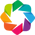

In [7]:
import holoviews as hv
hv.extension('bokeh')

from bokeh.io import export_svgs

In [7]:
from bokeh.themes.theme import Theme

# based on the "dark_minimal" Bokeh Theme : https://github.com/bokeh/bokeh/blob/branch-2.4/bokeh/themes/_dark_minimal.py
#
theme = Theme(
    json = {
    "attrs": {
        "Figure" : {
            "background_fill_color": "#000000",
            "border_fill_color": "#000000",
            "outline_line_color": "#000000",
            "outline_line_alpha": 0.25
        },

        "Grid": {
            "grid_line_color": "#E0E0E0",
            "grid_line_alpha": 0.25
        },

        "Axis": {
            "major_tick_line_alpha": 1,
            "major_tick_line_color": "#E0E0E0",

            "minor_tick_line_alpha": 1,
            "minor_tick_line_color": "#E0E0E0",

            "axis_line_alpha": 1,
            "axis_line_color": "#E0E0E0",

            "major_label_text_color": "#E0E0E0",
            "major_label_text_font": "Helvetica",
            "major_label_text_font_size": "0.8em",

            "axis_label_standoff": 10,
            "axis_label_text_color": "#E0E0E0",
            "axis_label_text_font": "Helvetica",
            "axis_label_text_font_size": "0.8em",
            "axis_label_text_font_style": "normal"
        },

        "Legend": {
            "spacing": 8,
            "glyph_width": 15,

            "label_standoff": 8,
            "label_text_color": "#E0E0E0",
            "label_text_font": "Helvetica",
            "label_text_font_size": "1.025em",

            "border_line_alpha": 0,
            "background_fill_alpha": 0.25,
            "background_fill_color": "#20262B"
        },

        "ColorBar": {
            "title_text_color": "#E0E0E0",
            "title_text_font": "Helvetica",
            "title_text_font_size": "1.025em",
            "title_text_font_style": "normal",

            "major_label_text_color": "#E0E0E0",
            "major_label_text_font": "Helvetica",
            "major_label_text_font_size": "1.025em",

            "background_fill_color": "#15191C",
            "major_tick_line_alpha": 0,
            "bar_line_alpha": 0
        },

        "Title": {
            "text_color": "#E0E0E0",
            "text_font": "Helvetica",
            "text_font_size": "1.15em"
        }
    }
})
hv.renderer('bokeh').theme = theme

In [8]:
#angle = np.linspace(-np.pi/2, 0, 100) # 25%
#angle = np.linspace(-np.pi/2, np.pi/2, 100) # 50%
#angle = np.linspace(-np.pi/2, np.pi, 100) # 75%
#angle = np.linspace(-np.pi/2, 3/2*np.pi, 100) # 100%

max_year = final_df['Year of mission'].max()
base_radius = 20

angle_1 = np.linspace(-np.pi/2, np.pi, 100)
radius_1 = max_year - 1961 + base_radius
circle_1 = list(zip(radius_1*np.sin(angle_1),  radius_1*np.cos(angle_1) ))
point_1 = [radius_1*np.sin(np.pi), radius_1*np.cos(np.pi)]

angle_2 = np.linspace(-np.pi/2, np.pi/2, 100)
radius_2 = max_year - 1990 + base_radius
circle_2 = list(zip(radius_2*np.sin(angle_2),  radius_2*np.cos(angle_2) ))
point_2 = [radius_2*np.sin(np.pi/2), radius_2*np.cos(np.pi/2)]

angle_3 = np.linspace(-np.pi/2, np.pi/3, 100)
radius_3 = max_year - 2000 + base_radius
circle_3 = list(zip(radius_3*np.sin(angle_3),  radius_3*np.cos(angle_3) ))
point_3 = [radius_3*np.sin(np.pi/3), radius_3*np.cos(np.pi/3)]


end_point_4 =  3*np.pi/2
angle_4 = np.linspace(-np.pi/2, end_point_4, 100)
radius_4 = max_year - 2018 + base_radius
circle_4 = list(zip(radius_4*np.sin(angle_4),  radius_4*np.cos(angle_4) ))
point_4 = [radius_4*np.sin(end_point_4), radius_4*np.cos(end_point_4)]

points_data =  [  point_1, point_2, point_3, point_4]
print(points_data)
points = hv.Points( points_data ).opts(color='white', size=2)

#circles = hv.Path(circle_1) *  hv.Path(circle_2) *  hv.Path(circle_3) *  hv.Path(circle_4)
circles = hv.Path( [circle_1, circle_2, circle_3 ] ) * hv.Path(circle_4)

( circles * points  ).opts(width=600, height=600)

[[9.552245033349356e-15, -78.0], [49.0, 3.0003846579110155e-15], [33.77499074759311, 19.500000000000004], [-21.0, -3.857637417314163e-15]]


:Overlay
   .Path.I   :Path   [x,y]
   .Path.II  :Path   [x,y]
   .Points.I :Points   [x,y]

### Actual plot



In [9]:
# Brand colors
colors = {
    'U.S.S.R/Russia' : '#452392',
    'U.S.' : '#99C941',
    'others' : '#A43A8F'
}

#shade of purple
colors = {
     'U.S.S.R/Russia' : '#452392',
     'U.S.' : '#663BC9',
     'others' :'#A183E6',  
}

#shade of green
#colors = {
#     'U.S.S.R/Russia' : '#597621',
#     'U.S.' : '#99C941',
#     'others' :'#C5E092',  
#}



f = 3     # f like "factor" in "zoom factor"

# We'll need to deduce some constants
longest_duration = final_df['Total hrs (sum)'].max()
max_duration = longest_duration *1.05  # this will be considered as 100% i.e a full circle

min_year = final_df['Year of mission'].min()

# We need the max year, and the max idx for the year
# - keep only the rows we're interested in
# - sort ascending
# - take the last row
# - convert to dict and extract the data, which are under the form [2019.0, 3]
max_year, max_idx_in_year = final_df[['Year of mission', 'idx_in_year']] \
                    .sort_values(['Year of mission', 'idx_in_year'], ascending=True) \
                    .tail(1) \
                    .to_dict('split')['data'][0]


def astronaut_glyphs_data(year_start, duration, max_duration, max_year):

    end_point = 2*np.pi * duration / max_duration - np.pi/2
    angle = np.linspace(-np.pi/2, end_point, 100)
    radius = (max_year - year_start + base_radius)*10
    circle_data = list(zip(radius*np.sin(angle),  radius*np.cos(angle) ))
    
    
    point_data = {"x":circle_data[-1][0], 
                  "y":circle_data[-1][1], 
                  "size": (2 + 6 * duration / max_duration) * f
                 }
    return circle_data, point_data
    

    
final_plot = None

# Each curve in the result plot is actually a hv.Path() with a list of coordinates representing the path.
# We could plot one hv.Path per astronaut, but it's not optimized, the rendering takes too long.
# Instead, we plot one hv.Path() per country. The data given to hv.Path is then a list, of list of coordinates.

list_nationalities = list(final_df['nationality'].value_counts().keys())
for nat in list_nationalities: 

    # curves will contains list of coordinates, one list per astronaut
    curves = []

    # points will contain the data for the points. This dict will be turned into a dataframe and given directly to hv.Points()
    points = {'x':[], 'y':[], 'size':[] }
    
    # For each astronaut
    for row in final_df[ final_df['nationality'] == nat  ].to_dict('records'):

        # The number of astronauts (i.e. the number of curves to plot per year), is not constant.
        # We need to give the function the year_start (year of mission), shifted by n/10 if there were 10 astronauts launches that year
        # Todo : rework this, make it more simple

        curve_data, point_data = astronaut_glyphs_data( row['Year of mission'] + row['idx_in_year'] / nbr_astro_per_year[ row['Year of mission']  ] ,
                               row['Total hrs (sum)'],
                               max_duration, 
                               max_year
                             )
        # append the data
        curves.append(curve_data)
        for k in ['x', 'y', 'size' ]:
            points[k].append(point_data[k])
        
    # At this point, we are ready to plot all the data for a given nationality.
    
    # color, based on the nationality
    color = colors[nat] if nat in colors else colors['others']
    
    # plot the curves themselves. I reuse the var name "curves" here.
    curves = hv.Path( curves ).opts(color=color, line_width=1 * f)
    
    # For each point, I plot two : a halo and the actual point.
    halos = hv.Points( pd.DataFrame(points), ).opts(color=color,  size=hv.dim('size')*2, alpha = 0.5, line_alpha=0.25, line_width=2, line_color=color )
    points = hv.Points( pd.DataFrame(points), ).opts(color=color,  size=hv.dim('size'),  line_alpha=0.75 )
    
    # append the plots to the final result
    if final_plot is None:
        final_plot = curves *  halos * points
    else:
        final_plot = final_plot * curves *  halos  * points

        

# adding the reference axis with the years



min_radius = (max_year+max_idx_in_year - min_year + base_radius)*10

max_radius = (max_year - min_year + base_radius)*10


# Let's add ticks and labels, one per decade + the last year
ticks = []
labels = {'x':[], 'y':[], 't':[]}
for year in list(range(int(min_year), int(max_year), 10)) + [max_year]:
    #for year in list(range(int(min_year/10)*10, int(max_year), 10)) + [max_year]:

    radius = (max_year - year + base_radius)*10
    x = radius * np.sin(-np.pi/2)
    y = radius * np.cos(-np.pi/2)
    tick = {
     "x0":x,
     "y0":y, 
     "x1":x,
     "y1":y - 10, 
    }
    
    ticks.append(tick)
    labels['x'].append(x - 7)
    labels['y'].append(y - 30)
    labels['t'].append(str(int(year)))
    


min_x = (max_year - min_year +base_radius)*10
max_x =  (-max_idx_in_year / nbr_astro_per_year[ max_year ] + base_radius)*10

main_axis = {"x0":min_x * np.sin(-np.pi/2),
             "y0":min_x * np.cos(-np.pi/2), 
             "x1":max_x * np.sin(-np.pi/2),
             "y1":max_x * np.cos(-np.pi/2), 
            }
    
reference_axis = hv.Segments( ticks + [main_axis]  ).opts(color='#444444')
labels = hv.Labels(labels, ['x', 'y'], 't').opts( text_color='#444444', text_font_size=f'{7*f}pt', angle=45)

final_plot = reference_axis * final_plot * labels 
    
final_plot = final_plot.opts(width=900*f , height=800*f, xaxis=None, yaxis=None, toolbar=None)

final_plot

:Overlay
   .Segments.I     :Segments   [x0,y0,x1,y1]
   .Path.I         :Path   [x,y]
   .Points.I       :Points   [x,y]   (size)
   .Points.II      :Points   [x,y]   (size)
   .Path.II        :Path   [x,y]
   .Points.III     :Points   [x,y]   (size)
   .Points.IV      :Points   [x,y]   (size)
   .Path.III       :Path   [x,y]
   .Points.V       :Points   [x,y]   (size)
   .Points.VI      :Points   [x,y]   (size)
   .Path.IV        :Path   [x,y]
   .Points.VII     :Points   [x,y]   (size)
   .Points.VIII    :Points   [x,y]   (size)
   .Path.V         :Path   [x,y]
   .Points.IX      :Points   [x,y]   (size)
   .Points.X       :Points   [x,y]   (size)
   .Path.VI        :Path   [x,y]
   .Points.XI      :Points   [x,y]   (size)
   .Points.XII     :Points   [x,y]   (size)
   .Path.VII       :Path   [x,y]
   .Points.XIII    :Points   [x,y]   (size)
   .Points.XIV     :Points   [x,y]   (size)
   .Path.VIII      :Path   [x,y]
   .Points.XV      :Points   [x,y]   (size)
   .Points.XVI     :Points   [x,y]   (size)
   .Path.IX        :Path   [x,y]
   .Points.XVII    :Points   [x,y]   (size)
   .Points.XVIII   :Points   [x,y]   (size)
   .Path.X         :Path   [x,y]
   .Points.XIX     :Points   [x,y]   (size)
   .Points.XX      :Points   [x,y]   (size)
   .Path.XI        :Path   [x,y]
   .Points.XXI     :Points   [x,y]   (size)
   .Points.XXII    :Points   [x,y]   (size)
   .Path.XII       :Path   [x,y]
   .Points.XXIII   :Points   [x,y]   (size)
   .Points.XXIV    :Points   [x,y]   (size)
   .Path.XIII      :Path   [x,y]
   .Points.XXV     :Points   [x,y]   (size)
   .Points.XXVI    :Points   [x,y]   (size)
   .Path.XIV       :Path   [x,y]
   .Points.XXVII   :Points   [x,y]   (size)
   .Points.XXVIII  :Points   [x,y]   (size)
   .Path.XV        :Path   [x,y]
   .Points.XXIX    :Points   [x,y]   (size)
   .Points.XXX     :Points   [x,y]   (size)
   .Path.XVI       :Path   [x,y]
   .Points.XXXI    :Points   [x,y]   (size)
   .Points.XXXII   :Points   [x,y]   (size)
   .Path.XVII      :Path   [x,y]
   .Points.XXXIII  :Points   [x,y]   (size)
   .Points.XXXIV   :Points   [x,y]   (size)
   .Path.XVIII     :Path   [x,y]
   .Points.XXXV    :Points   [x,y]   (size)
   .Points.XXXVI   :Points   [x,y]   (size)
   .Path.XIX       :Path   [x,y]
   .Points.XXXVII  :Points   [x,y]   (size)
   .Points.XXXVIII :Points   [x,y]   (size)
   .Path.XX        :Path   [x,y]
   .Points.XXXIX   :Points   [x,y]   (size)
   .Points.XL      :Points   [x,y]   (size)
   .Path.XXI       :Path   [x,y]
   .Points.XLI     :Points   [x,y]   (size)
   .Points.XLII    :Points   [x,y]   (size)
   .Path.XXII      :Path   [x,y]
   .Points.XLIII   :Points   [x,y]   (size)
   .Points.XLIV    :Points   [x,y]   (size)
   .Path.XXIII     :Path   [x,y]
   .Points.XLV     :Points   [x,y]   (size)
   .Points.XLVI    :Points   [x,y]   (size)
   .Path.XXIV      :Path   [x,y]
   .Points.XLVII   :Points   [x,y]   (size)
   .Points.XLVIII  :Points   [x,y]   (size)
   .Path.XXV       :Path   [x,y]
   .Points.XLIX    :Points   [x,y]   (size)
   .Points.L       :Points   [x,y]   (size)
   .Path.XXVI      :Path   [x,y]
   .Points.LI      :Points   [x,y]   (size)
   .Points.LII     :Points   [x,y]   (size)
   .Path.XXVII     :Path   [x,y]
   .Points.LIII    :Points   [x,y]   (size)
   .Points.LIV     :Points   [x,y]   (size)
   .Path.XXVIII    :Path   [x,y]
   .Points.LV      :Points   [x,y]   (size)
   .Points.LVI     :Points   [x,y]   (size)
   .Path.XXIX      :Path   [x,y]
   .Points.LVII    :Points   [x,y]   (size)
   .Points.LVIII   :Points   [x,y]   (size)
   .Path.XXX       :Path   [x,y]
   .Points.LIX     :Points   [x,y]   (size)
   .Points.LX      :Points   [x,y]   (size)
   .Path.XXXI      :Path   [x,y]
   .Points.LXI     :Points   [x,y]   (size)
   .Points.LXII    :Points   [x,y]   (size)
   .Path.XXXII     :Path   [x,y]
   .Points.LXIII   :Points   [x,y]   (size)
   .Points.LXIV    :Points   [x,y]   (size)
   .Path.XXXIII    :Path   [x,y]
   .Points.LXV     :Points   [x,y]   (siz

In [10]:
# you may need to run the following : 
# pip install selenium
# conda install -c conda-forge firefox geckodriver
hv.save(final_plot, 'astronauts_purple_thick_1_f3.png', fmt='png')